## **Anomaly Detection**

### Isolation Forest 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


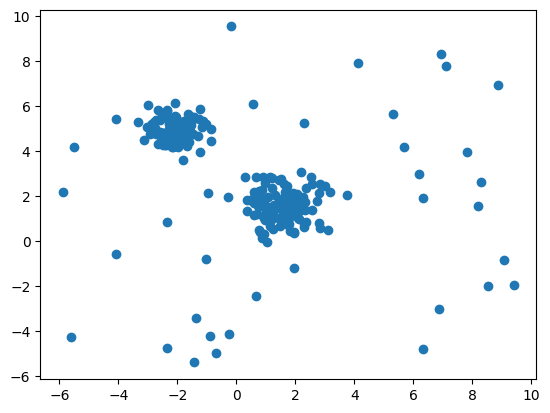

In [8]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [9]:
from sklearn.ensemble import IsolationForest

In [11]:
mdl = IsolationForest(contamination=0.2)
mdl.fit(df)

IsolationForest(contamination=0.2)

In [13]:
pred = mdl.predict(df)

In [14]:
pred

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

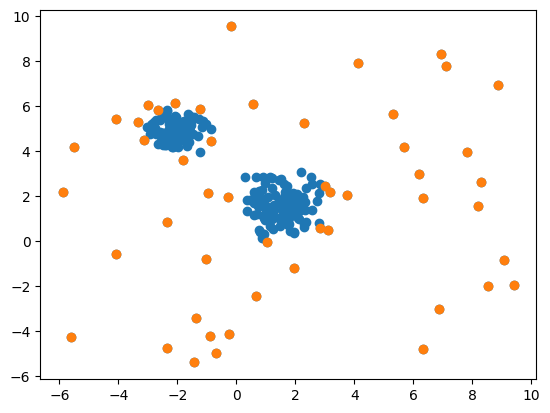

In [17]:
index = np.where(pred<0)
x = df.values
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index, 0], x[index, 1])

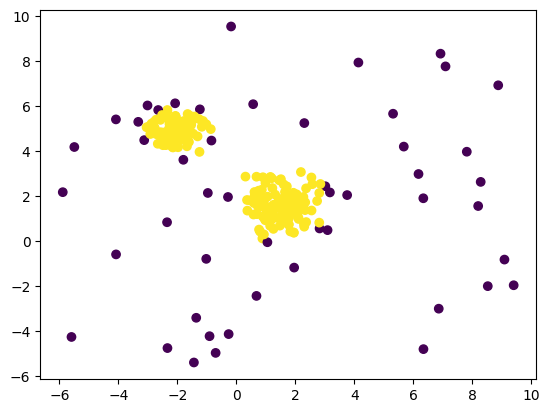

In [18]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = pred)

## DBSCAN

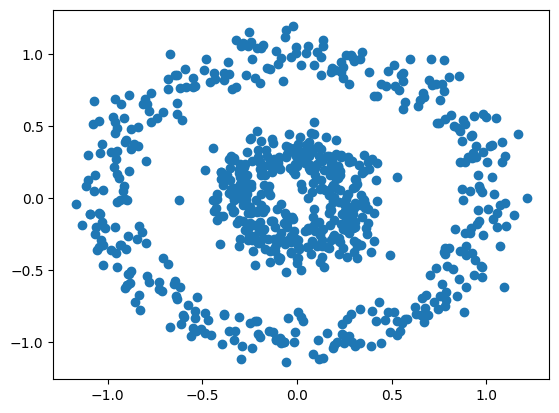

In [19]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_circles
x,y = make_circles(n_samples= 750, factor = 0.3, noise=0.1)
plt.scatter(x[:,0], x[:,1])

In [20]:
dbscan = DBSCAN(eps = 0.1)
dbscan.fit_predict(x)

array([ 0,  1,  1,  2,  3,  1,  1,  2, -1,  1,  3,  4,  1,  1,  1,  3,  1,
        5,  9,  1,  1,  6,  6,  1,  1,  7,  1,  1,  1,  6,  3,  1,  1,  7,
        1,  4,  1,  1,  7,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  3,
        5,  5,  0,  1,  4,  3,  1,  7,  1,  1,  0,  3,  6,  7,  4,  1,  1,
        3,  5,  0,  1,  1,  1,  1,  2,  1,  1,  1,  5,  1,  1,  1,  0,  7,
        3,  1,  8,  1,  1,  1,  5, -1,  1,  0,  7,  5,  1,  3,  0,  3,  5,
        0,  0,  1,  1,  1,  0,  1,  1,  6,  1,  2,  1,  1,  0,  3, -1,  8,
        4,  0,  1,  5,  1,  1,  9,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
       -1,  2,  1,  0,  1,  1,  1,  1, -1,  1,  3,  1,  3,  5,  1,  6,  1,
        3,  0,  1,  1,  1,  7,  1,  1,  0,  1,  1,  1,  3,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  3,  3,  3,  7,  1, -1,  1,  1, -1,  7,  1,  0,
        7,  0,  1,  1,  1,  1,  2,  3,  2,  1,  9,  4, -1,  1,  7,  1,  1,
        1,  7,  1,  1,  1,  1, -1,  1,  1,  3,  1,  5,  1,  1,  6,  1,  4,
        6, -1,  1,  0,  1

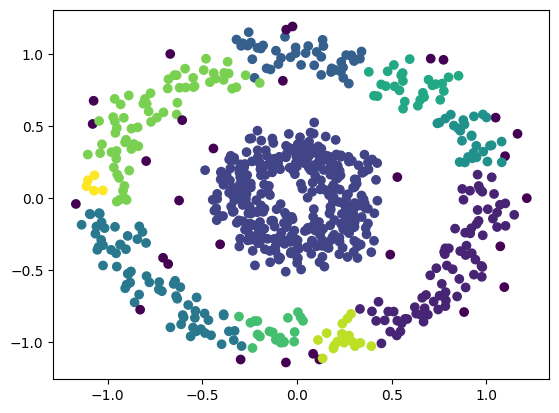

In [21]:
plt.scatter(x[:,0], x[:,1], c = dbscan.labels_)

## Local Outlier factor implementation

In [22]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=300, noise=0.1)

In [23]:
X_outliers = np.random.uniform(low=-3, high=3, size=(20, 2))
X = np.vstack((X, X_outliers))

In [24]:
out = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = out.fit_predict(X)

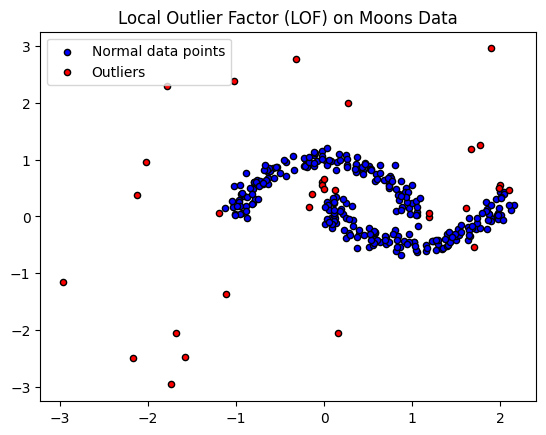

In [25]:
# Separate normal data points>>inliers and outliers 
X_inliers = X[y_pred == 1]
X_outliers = X[y_pred == -1]

# Plotting
plt.title("Local Outlier Factor (LOF) on Moons Data")
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=20, edgecolor='k', label='Normal data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=20, edgecolor='k', label='Outliers')
plt.legend()
plt.show()